In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import plotly.express as px

In [3]:
# 1
df = pd.read_csv("gapminder_clean.csv")
df

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,2602,Zimbabwe,1987,14.407528,1.598217,74.161607,878.072691,896.673611,24.015710,5.784,1.150737,21.274886,32.451242,7.189361,61.753805,24.649495,53.141236,9216418.0,Africa,706.157306
2603,2603,Zimbabwe,1992,7.413793,1.533724,43.120518,778.695133,923.493407,27.227263,4.840,-9.015570,36.485231,40.862069,-14.129659,56.491976,28.485762,51.724135,10704340.0,Africa,693.420786
2604,2604,Zimbabwe,1997,18.934082,1.194678,63.058320,870.988697,804.508892,37.595273,4.237,2.680594,44.609791,25.554678,-2.879048,46.065902,31.174507,55.511236,11404948.0,Africa,792.449960
2605,2605,Zimbabwe,2002,14.029007,0.942795,164.559047,827.329873,772.676619,31.834799,4.018,-8.894023,34.972553,NaN,2.712950,40.679146,32.807111,NaN,11926563.0,Africa,672.038623


In [4]:
df.dtypes

Unnamed: 0                                                   int64
Country Name                                                object
Year                                                         int64
Agriculture, value added (% of GDP)                        float64
CO2 emissions (metric tons per capita)                     float64
Domestic credit provided by financial sector (% of GDP)    float64
Electric power consumption (kWh per capita)                float64
Energy use (kg of oil equivalent per capita)               float64
Exports of goods and services (% of GDP)                   float64
Fertility rate, total (births per woman)                   float64
GDP growth (annual %)                                      float64
Imports of goods and services (% of GDP)                   float64
Industry, value added (% of GDP)                           float64
Inflation, GDP deflator (annual %)                         float64
Life expectancy at birth, total (years)                    flo

<AxesSubplot:xlabel='CO2 emissions (metric tons per capita)', ylabel='gdpPercap'>

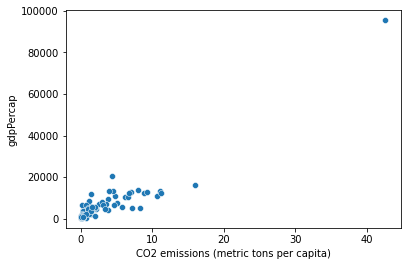

In [5]:
# 2
filt_df = df[df["Year"] == 1962]
sns.scatterplot(data = filt_df, x= "CO2 emissions (metric tons per capita)", y = "gdpPercap")

In [6]:
# remove rows if one or other has nas
nas = filt_df["gdpPercap"].isna() | filt_df["CO2 emissions (metric tons per capita)"].isna()
filt_df = filt_df[~nas]

In [7]:
assert(len(filt_df["CO2 emissions (metric tons per capita)"]) == len(filt_df["gdpPercap"]))

In [8]:
# 3
# https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
covariance = np.cov(filt_df["CO2 emissions (metric tons per capita)"], filt_df["gdpPercap"])

# Relationship between CO2 emissions and gdpPercap is positive. Both change in same direction.
covariance

array([[2.46358644e+01, 4.48639240e+04],
       [4.48639240e+04, 9.52638497e+07]])

In [9]:
p_corr_coeff = covariance[1,0] /(np.std(filt_df["CO2 emissions (metric tons per capita)"]) * np.std(filt_df["gdpPercap"]))
p_corr_coeff

0.9347366414038345

In [10]:
r, prob = pearsonr(filt_df["CO2 emissions (metric tons per capita)"], filt_df["gdpPercap"])
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# Strong correlation between CO2 emissions per cap and gross domestic product per cap
# w/low prob of producing r by random chance from uncorr data
r, prob

(0.926081672501947, 1.1286792210040484e-46)

In [11]:
# 4
years = df["Year"].unique()
years

array([1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007],
      dtype=int64)

In [26]:
# create functions to repeat data processing and stat calculations
def filter_df_year(df, year):
    filt_df = df[df["Year"] == year]
    # remove rows if one or other has nas
    nas = filt_df["gdpPercap"].isna() | filt_df["CO2 emissions (metric tons per capita)"].isna()
    filt_df = filt_df[~nas]
    return filt_df

def yearly_correlation(df, year):
    filt_df = filter_df_year(df, year)
    r, prob = pearsonr(filt_df["CO2 emissions (metric tons per capita)"], filt_df["gdpPercap"])
    return r, prob

In [27]:
r_for_year = [yearly_correlation(df, year)[0] for year in years]

In [28]:
highest_r_year = years[list(r_for_year).index(max(r_for_year))]

In [30]:
df_h_r = filter_df_year(df, highest_r_year)

fig = px.scatter(df_h_r, 
                 x = df_h_r["CO2 emissions (metric tons per capita)"], y = df_h_r["gdpPercap"], 
                 size = df_h_r["pop"], color = df_h_r["continent"])
fig.show()